In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tfn_backbone import TFNEigenNet
import jax
from jax.config import config
config.update('jax_platform_name', 'cpu')
import jax.numpy as jnp
import matplotlib.pyplot as plt

model = TFNEigenNet([4, 4, 5], -50, 50)
key = jax.random.PRNGKey(1)
B = 3000
D = 3



x = jax.random.uniform(key, (B, 1, 3), minval=-D, maxval=D)
# x = coordinates
# L_inv = jax.random.uniform(key, (2, 2))
weights = model.init(key, x[0])

vmodel = jax.vmap(model.apply, in_axes=[None, 0])
out = vmodel(weights, x)
out.shape
# out = model.apply(weights, x)
# out.shape

ValueError: Einstein sum subscript 'abfj' does not contain the correct number of indices for operand 1.

In [3]:
# s = out[:,0,0,0]
# px = out[:,0,0,1]
# py = out[:,0,0,2]
# pz = out[:,0,0,3]

In [4]:
# from train_tfn_spin import covariance

# sigma = covariance(out, out)

In [5]:
# L_inv = jnp.linalg.inv(jnp.linalg.cholesky(sigma))

In [6]:
# L_inv

In [3]:
xs, ys, zs = x[:,1].T
xs.shape

(3000,)

In [4]:
# each of these lines is a different p-orbital
# cs = out[0,:,0,0]
# cs = out[0,:,0,1]
# out = jnp.einsum('ij, bj -> bi', L_inv, out)
# cs = s + px + py + pz
# cs

# cs = out[:,1]
# cs

In [5]:
%matplotlib widget

In [4]:
out.shape

(3000, 5)

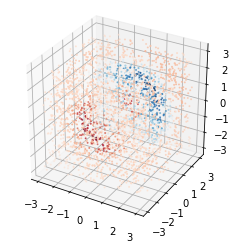

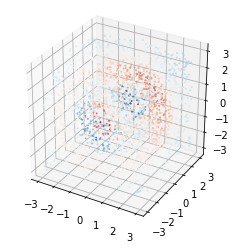

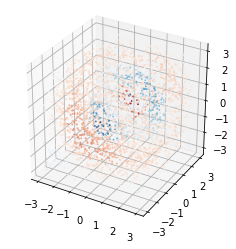

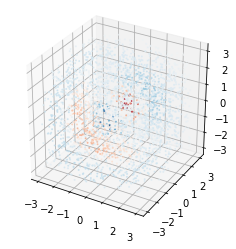

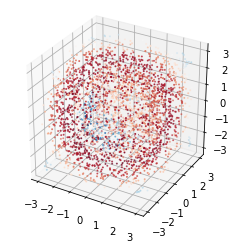

In [5]:
for i in range(5):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_box_aspect([1,1,1])
    ax.scatter(xs, ys, zs, s=1, c=out[:,i], cmap='RdBu')